In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import math

In [2]:
df = pd.read_csv('all_reviews.csv')

In [3]:
print(df.head())

   Year              Date  User  Release  Score  Band
0  2002  2002.07.11.06:45     8   517380     82  21.0
1  2002  2002.07.14.09:19     8       46     88  14.0
2  2002  2002.07.15.00:23    20      133     90  39.0
3  2002  2002.07.16.03:43    21        2     87   4.0
4  2002  2002.07.16.22:38    14       21     70   3.0


In [4]:
posScore = df['Score'].quantile(.5)

In [5]:
print(df.columns)
print("50th Percentile at",posScore)

Index(['Year', 'Date', 'User', 'Release', 'Score', 'Band'], dtype='object')
50th Percentile at 83.0


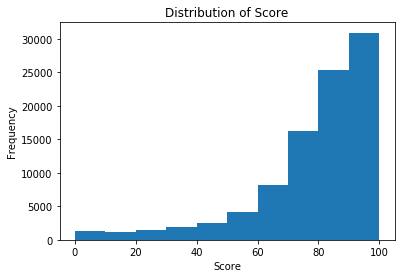

In [6]:
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.hist(df['Score'])
plt.savefig("Distribution of Score.png")

In [7]:
mp = {} #mp[release] = list(reviews)
for i in range(len(df)):
    if df['Score'][i] > posScore:#positive review is defined as 50th percentile or above
    #if df['Score'][i] == 100:#only consider positive review as full score of 100
        if df['Release'][i] not in mp:
            mp[df['Release'][i]] = []
        mp[df['Release'][i]].append((df['User'][i],float(df['Score'][i])))

In [8]:
G = nx.Graph() #network of users
B = nx.Graph() #bipartite

In [9]:
#construction of bipartite graph between users and releases
users = set()
for release in mp:
    for item in mp[release]:
        B.add_edge(release,str(item[0])+'U')#to differentiate items in bipartite graph
        users.add(str(item[0])+'U')

In [10]:
edges = {}
for user in users:
    for release in B.adj[user]:
        for node in B.adj[release]:
            if node != user:
                if (user, node) in edges:
                    edges[(user, node)] += 1
                elif (node, release) in edges:
                    edges[(node, user)] += 1
                else:
                    edges[(user, node)] = 1

for edge in edges:
    G.add_edge(edge[0], edge[1], weight = edges[edge])

In [11]:
print("Number of Releases Used =",len(mp))

Number of Releases Used = 23182


In [12]:
for u,v in G.edges():
    #similarity = 2*overlap/sum of degrees of u and v
    G[u][v]['similarity'] = (2*G[u][v]['weight'])/(G.degree(u)+G.degree(v))

In [13]:
#Assigning weights based on frequency
weights = [G[u][v]['weight'] for u,v in G.edges()]
sim = [G[u][v]['similarity'] for u,v in G.edges()]
#print(weights)

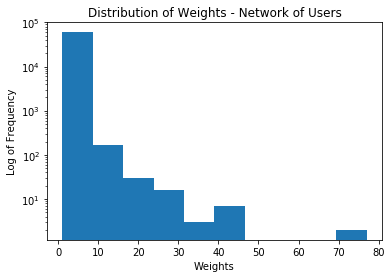

In [14]:
plt.title('Distribution of Weights - Network of Users')
plt.xlabel('Weights')
plt.ylabel('Log of Frequency')
plt.hist(weights, log = True)
plt.savefig("Distribution of Weights - Network of Users.png")

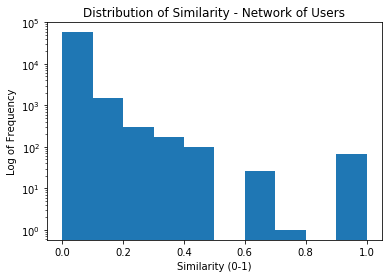

In [15]:
plt.title('Distribution of Similarity - Network of Users')
plt.xlabel('Similarity (0-1)')
plt.ylabel('Log of Frequency')
plt.hist(sim, log = True)
plt.savefig("Distribution of Similarity - Network of Users.png")

In [16]:
print("Maximum Weight (i.e. Frequency) =",max(weights))
print("Number of edges =",len(weights))
print("Number of nodes =",len(G.nodes()))

Maximum Weight (i.e. Frequency) = 77
Number of edges = 60136
Number of nodes = 6118


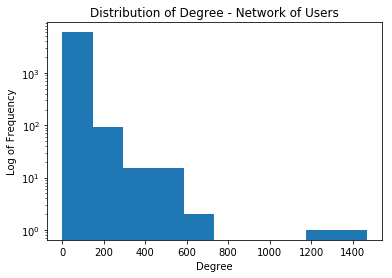

In [17]:
plt.title('Distribution of Degree - Network of Users')
plt.xlabel('Degree')
plt.ylabel('Log of Frequency')
plt.hist([b for a,b in G.degree(list(G.nodes()))],log = True)
plt.savefig("Distribution of Degree - Network of Users.png")
#print([b for a,b in G.degree(list(G.nodes()))])
#Hopefully able to observe Power Law Distribution

In [18]:
#Only run this when size is small
#nx.draw(G, node_size = 10, width = weights)
#plt.show()

In [19]:
#Splitting the graph into connected subgraphs
'''
graphs = list(nx.connected_components(G))

for subgraph in graphs:
    if len(subgraph) < 3:#only consider subgraphs with size > 3
        continue
    graph = G.subgraph(subgraph)
    weights1 = [graph[u][v]['weight'] for u,v in graph.edges()]
    nx.draw(graph, node_size = 10, width = weights1)
    plt.show()
'''

"\ngraphs = list(nx.connected_components(G))\n\nfor subgraph in graphs:\n    if len(subgraph) < 3:#only consider subgraphs with size > 3\n        continue\n    graph = G.subgraph(subgraph)\n    weights1 = [graph[u][v]['weight'] for u,v in graph.edges()]\n    nx.draw(graph, node_size = 10, width = weights1)\n    plt.show()\n"

In [20]:
H = nx.Graph() #network of releases

In [21]:
edgesNew = {}
for release in mp:
    for item in B.adj[release]:
        for node in B.adj[item]:
            if node != release:
                if (release, node) in edgesNew:
                    edgesNew[(release, node)] += 1
                elif (node, release) in edgesNew:
                    edgesNew[(node, release)] += 1
                else:
                    edgesNew[(release, node)] = 1
                
for edge in edgesNew:
    H.add_edge(edge[0], edge[1], weight = edgesNew[edge])

#Assigning weights based on frequency
weightsNew = [H[u][v]['weight'] for u,v in H.edges()]

In [22]:
print("Number of Nodes =",len(H.nodes()))
print("Number of Edges =",len(H.edges()))
print("Maximum Weight =",max(weightsNew))
print("Minimum Weight =",min(weightsNew))

Number of Nodes = 21668
Number of Edges = 2373898
Maximum Weight = 22
Minimum Weight = 2


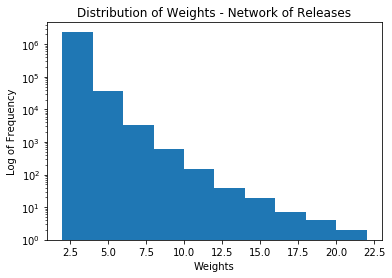

In [23]:
plt.title('Distribution of Weights - Network of Releases')
plt.xlabel('Weights')
plt.ylabel('Log of Frequency')
plt.hist(weightsNew, log = True)
plt.savefig("Distribution of Weights - Network of Releases.png")

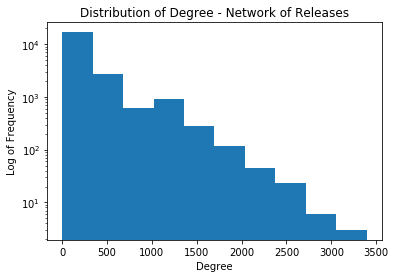

In [24]:
plt.title('Distribution of Degree - Network of Releases')
plt.xlabel('Degree')
plt.ylabel('Log of Frequency')
plt.hist([b for a,b in H.degree(list(H.nodes()))],log = True)
plt.savefig("Distribution of Degree - Network of Releases.png")
#print([H for a,b in H.degree(list(H.nodes()))])
#Hopefully able to observe Power Law Distribution

In [25]:
#Only run this when size is small
#nx.draw(H, node_size = 10, width = weightsNew)
#plt.show()